<a href="https://colab.research.google.com/github/JobayerMahin/ETE-456-Project-Reports/blob/main/1608026_DeepNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Deep Neural Network (DNN)

Course No: ETE 456

Name: Jobayer Alam Mahin

ID: 1608026

**Objective**

1.Classification problems using Deep Neural Network.

2.Develop DNN models using Tensorflow Framework



**Introduction :**   
In this experiment Deep Nueral Network is applied to find the accuracy of the model . Data preprocessing is a main task to fit any data to a model so , dealing with missing values and converting the categorical data to numerical is an important task as mechinelearning model can't work with any categorical data .

#Dataset

In [1]:
!wget -O diabetes.csv  https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0

--2021-12-21 06:45:16--  https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sglreynnyx40pb6/diabetes.csv [following]
--2021-12-21 06:45:16--  https://www.dropbox.com/s/raw/sglreynnyx40pb6/diabetes.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca9a48a28e69b3a174c8a276e8a.dl.dropboxusercontent.com/cd/0/inline/BcOxsICfKXod6n8YBm1aMShMEArEBZAyLQZu6WVZ7-bh0tGUbNA4_YZI_KPX722WdHJUpoa-UMfOPj19ap3hQBsiS9tiJHrY9B_NZlyKXDPFzMafXXFQzLhQOhRzWNYxHrpPsnz3UFvrIwM1ROPPJYnz/file# [following]
--2021-12-21 06:45:16--  https://uca9a48a28e69b3a174c8a276e8a.dl.dropboxusercontent.com/cd/0/inline/BcOxsICfKXod6n8YBm1aMShMEArEBZAyLQZu6WVZ7-bh0tGUbNA4_YZI_KPX722WdHJUpoa-UMfOPj19ap3hQ

#Import the libraries

In [2]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt       
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
dataset = pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
dataset.isnull().value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI    DiabetesPedigreeFunction  Age    Outcome
False        False    False          False          False    False  False                     False  False      768
dtype: int64

In [4]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#Splitting Between Dependent And Independent 

In [5]:
feature = dataset[['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']]  # for independent
target = dataset[['Outcome']]   # for dependent

In [6]:
feature

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,0,33.6,0.627,50
1,1,85,66,0,26.6,0.351,31
2,8,183,64,0,23.3,0.672,32
3,1,89,66,94,28.1,0.167,21
4,0,137,40,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63
764,2,122,70,0,36.8,0.340,27
765,5,121,72,112,26.2,0.245,30
766,1,126,60,0,30.1,0.349,47


In [7]:
target

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


#Splitting the dataset

In [9]:
X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size = 0.15,random_state = 0)

In [10]:
print(X_train.shape)
print(X_test.shape)

(652, 7)
(116, 7)


In [11]:
X_sc = StandardScaler()
X_train = X_sc.fit_transform(X_train)
X_test = X_sc.transform(X_test)

#Building a Multilayer Neural Network with Tensorflow Keras

In [12]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [13]:
#built the neural network architecture
model = Sequential()
model.add(Dense(20, input_dim=7, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                160       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________


#Compiling The Model

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
#train the neural network on the train dataset
history = model.fit(X_train, y_train, epochs=150, validation_split=0.2)

Epoch 1/150
17/17 [==============================] - 1s 14ms/step - loss: 0.7401 - accuracy: 0.3570 - val_loss: 0.6976 - val_accuracy: 0.5496
Epoch 2/150
17/17 [==============================] - 0s 4ms/step - loss: 0.6755 - accuracy: 0.5950 - val_loss: 0.6372 - val_accuracy: 0.6870
Epoch 3/150
17/17 [==============================] - 0s 4ms/step - loss: 0.6388 - accuracy: 0.6296 - val_loss: 0.5954 - val_accuracy: 0.6947
Epoch 4/150
17/17 [==============================] - 0s 3ms/step - loss: 0.6114 - accuracy: 0.6315 - val_loss: 0.5727 - val_accuracy: 0.6947
Epoch 5/150
17/17 [==============================] - 0s 4ms/step - loss: 0.5931 - accuracy: 0.6353 - val_loss: 0.5548 - val_accuracy: 0.7023
Epoch 6/150
17/17 [==============================] - 0s 4ms/step - loss: 0.5788 - accuracy: 0.6411 - val_loss: 0.5429 - val_accuracy: 0.7176
Epoch 7/150
17/17 [==============================] - 0s 3ms/step - loss: 0.5667 - accuracy: 0.6468 - val_loss: 0.5339 - val_accuracy: 0.7176
Epoch 8/150


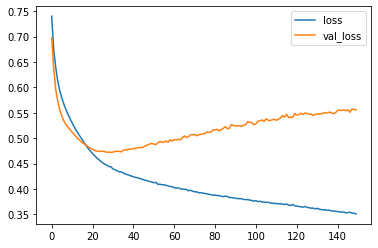

In [17]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')
plt.legend()

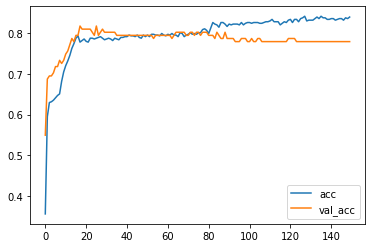

In [18]:
plt.plot(history_df['accuracy'], label='acc')
plt.plot(history_df['val_accuracy'], label='val_acc')
plt.legend()

In [21]:
#Prediction
y_pred = model.predict(X_test)

In [22]:
y_pred = y_pred > 0.5
y_pred

array([[ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82        78
           1       0.63      0.68      0.66        38

    accuracy                           0.77       116
   macro avg       0.74      0.75      0.74       116
weighted avg       0.77      0.77      0.77       116



#Result Analysis    
The model was good for the dataset and the accuracy was about 77 percent .For DNN model epoches is an important part and validation split was 20 percent which means 20 percent data were used for the test data which is varying model to model.